In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
bad_coils = [5514681,5514677,5514672,5514670,5514668,5514674,5513807,5512575,5503973,5503968,5504079,5499471,5522770,5520684,5519680,5520680,5519376]
good_coils = [5484972,5484981,5485581,5487008,5488171,5486250,5487948,5487932,5487937,5487949,5487953,5487951,5490707,5492525,5493226,5493229,5493231,5493809,5499738,5499642,5499278,5500841,5504100,5504098,5504094,5510195]

In [50]:
df = pd.read_csv(r"D:\Stelco\Work\Dynamic Correlation\4stand_Metadata_static.csv")

In [58]:
df1 = df[df['Parent_Coil_ID'].isin(good_coils)]

In [59]:
df1["Parent_Coil_ID"] = df1["Parent_Coil_ID"].astype(int)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17292\2270277830.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Parent_Coil_ID"] = df1["Parent_Coil_ID"].astype(int)


In [60]:
df1[["Parent_Coil_ID","coillengthprime"]]

,Parent_Coil_ID,coillengthprime
32657,5484972,5130.0
32658,5484981,5161.0
32772,5485581,5058.0
33493,5487008,5340.0
33503,5486250,8116.0
33507,5488171,5873.0
33543,5487932,8780.0
33544,5487937,8532.0
33545,5487948,8346.0
33546,5487949,8585.0


In [28]:
dfgood = pd.read_csv(r"D:\Stelco\Work\Dynamic Correlation\Key\Whole_Phase\5487937.csv")
dfbad = pd.read_csv(r"D:\Stelco\Work\Dynamic Correlation\Key\Whole_Phase\5512575.csv")

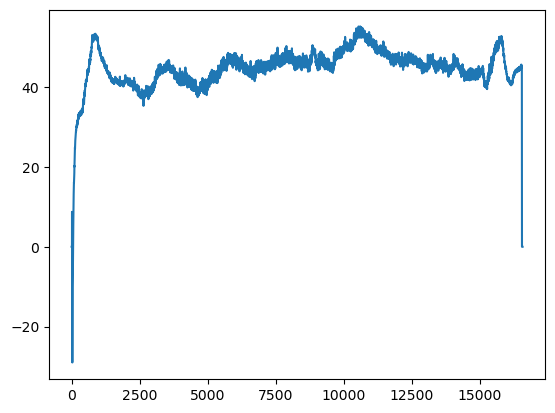

In [33]:
plt.plot(dfbad["Coil Length [30ms]"],dfbad["Stand 4 OS Bending Shape Trim"])

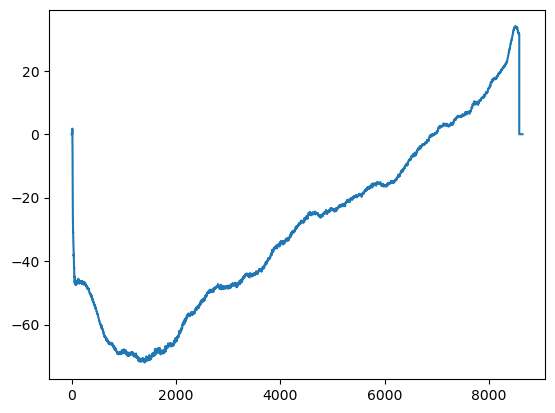

In [34]:
plt.plot(dfgood["Coil Length [30ms]"],dfgood["Stand 4 OS Bending Shape Trim"])

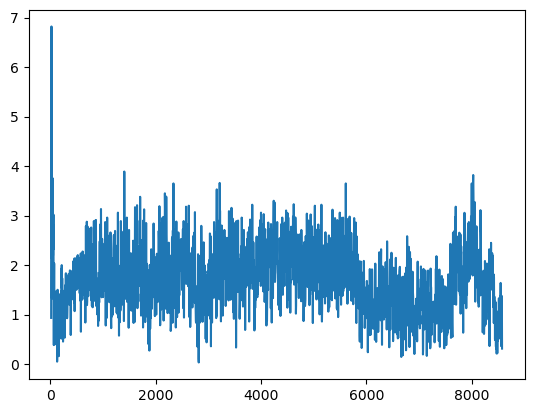

In [29]:
plt.plot(dfgood["Coil Length [30ms]"],dfgood["Operator_Q_VW_OLD_OPTECH"])

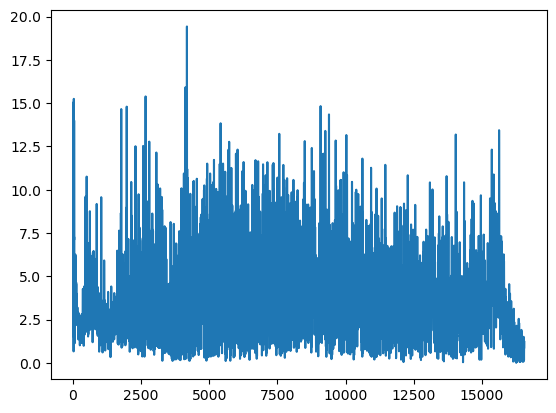

In [30]:
plt.plot(dfbad["Coil Length [30ms]"],dfbad["Operator_Q_VW_OLD_OPTECH"])

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

def dual_yaxis_subplots_save_each(csv_file, x_col, y1_col, y2_list, shift=0):
    filename = csv_file.split('\\')[-1]         # Gets 'coil_id.csv'
    coil_id = filename.split('.')[0]
    coilstatus=""
    if(coil_id in bad_coils):
        coilstatus += "bad"
    elif(coil_id in good_coils):
        coilstatus += "good"
        
    df = pd.read_csv(csv_file)
    
    for y2_col in y2_list:
        fig, ax = plt.subplots(figsize=(12, 6))
        x = df[x_col]
        y1 = df[y1_col]
        y2 = df[y2_col] - shift
        
        ln1 = ax.plot(x, y1, color='blue', label=y1_col)
        ax.set_ylabel(y1_col, color='blue')
        
        ax2 = ax.twinx()
        ln2 = ax2.plot(x, y2, color='red', label=f"{y2_col}")
        ax2.set_ylabel(y2_col, color='red')
        
        lns = ln2 + ln1
        labels = [l.get_label() for l in lns]
        ax.legend(lns, labels, loc='best')
        
        title = f"({coil_id}) {x_col} vs {y1_col} & {y2_col}"
        ax.set_title(title)
        ax.set_xlabel(x_col)
        
        plt.tight_layout(pad=6.0)
        
        # Use title as filename, replace spaces and special characters with underscore
        filename = title.replace(" ", "_").replace("&", "and").replace("(", "").replace(")", "") + '.png'
        # filename = "["+coil_id+"]"+filename
        output_path = f"C:/Users/USER/Desktop/Jupyter Notebook/Stelco/Bad/" + filename
        fig.savefig(output_path, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close(fig)  # Close figure to free memory


In [5]:
signals = ['Stand 4 DS Total Bending Feedback', 'Stand 4 DS Bending Shape Trim','Stand 4 OS Total Bending Feedback','Stand 4 OS Bending Shape Trim','Exit Tension Reel RPM', 'Exit Tension Reel Tension Reference', 'Roll Force Hydraulic Tank Level Inches', 

In [46]:
good_csv_file = r"D:\Stelco\Work\Dynamic Correlation\Key\Whole_Phase\5493809.csv"
bad_csv_file = r"D:\Stelco\Work\Dynamic Correlation\Key\Whole_Phase\5503968.csv"

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_17292\1393814763.py:13: DtypeWarning: Columns (8,9,10,12,14,28,29,31,33,35,42,46,47,49,50,51,53,55,61,66,67,70,74,75,79,80,83,84,85,87,93,96,104,106,116,118,119,123,124,125,126,127,129,135,136,139,142,165,166,167,168,169,170,171,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


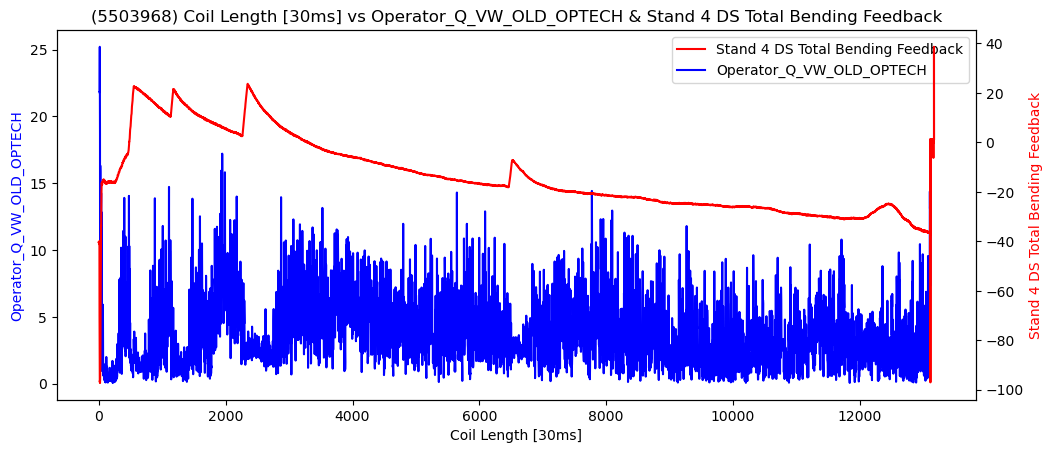

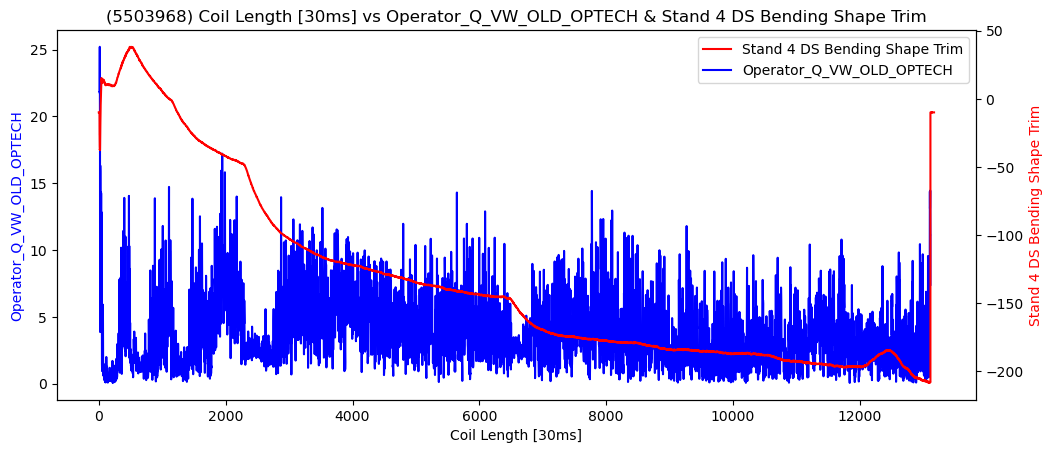

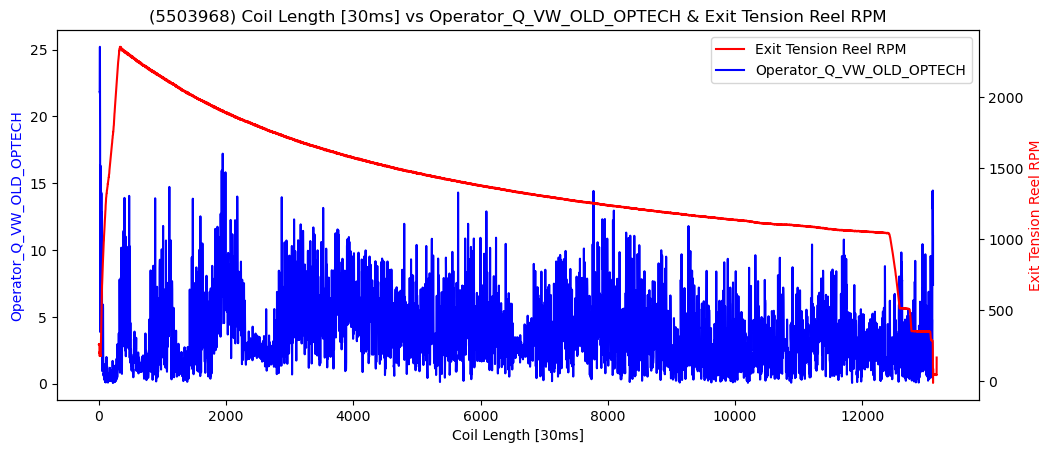

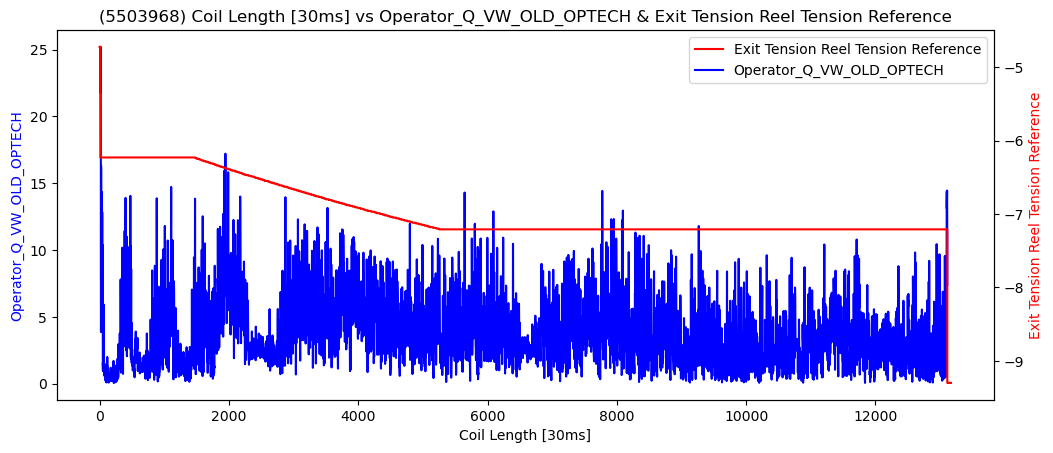

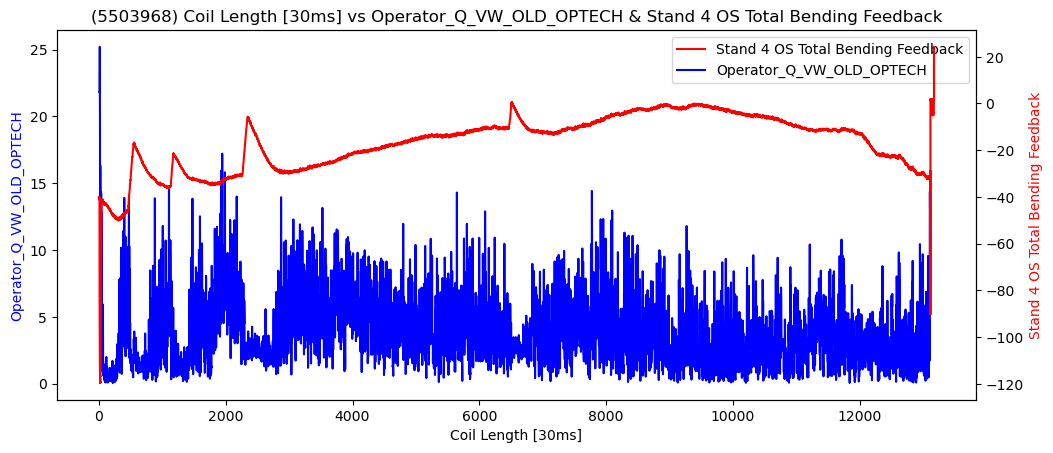

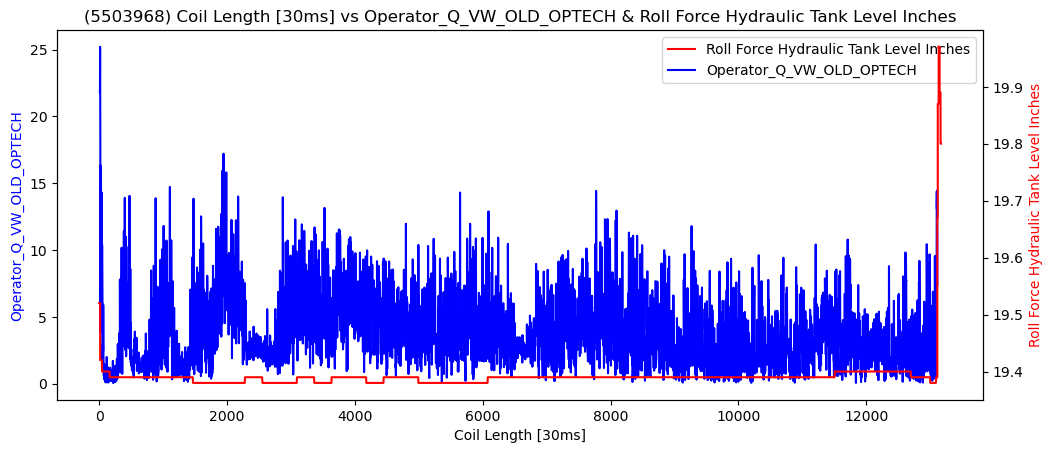

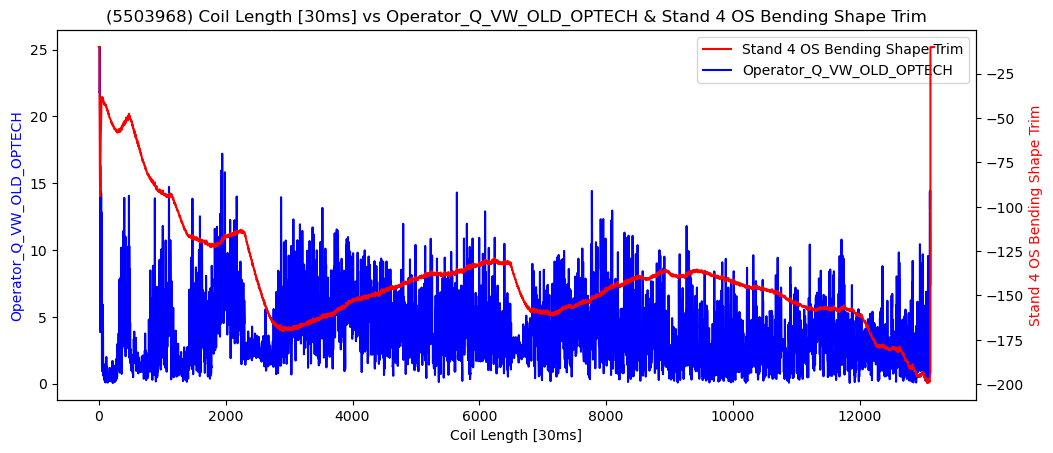

In [47]:
dual_yaxis_subplots_save_each(bad_csv_file, x_col="Coil Length [30ms]", y1_col="Operator_Q_VW_OLD_OPTECH", y2_list=signals, shift=10)